In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta as ta
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from mom import get_data,Strategy
# plt.style.use('seaborn')

In [5]:
df_dict = {}
candidate = ['SOL','XRP']#['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
for coin in candidate:
    try:
        df_dict[coin] = get_data(coin)
    except:
        pass

Start                               2022-01-01 00:00:00
End                                 2023-11-07 00:00:00
Period                                675 days 00:15:00
Start Value                                     10000.0
Min Value                                   9934.759623
Max Value                                   21713.05048
End Value                                  21185.448604
Total Return [%]                             111.854486
Benchmark Return [%]                         -75.317456
Total Time Exposure [%]                       11.209704
Max Gross Exposure [%]                       100.475172
Max Drawdown [%]                              10.285165
Max Drawdown Duration                 125 days 01:00:00
Total Orders                                        565
Total Fees Paid                             1697.752166
Total Trades                                        283
Win Rate [%]                                  51.236749
Best Trade [%]                                19

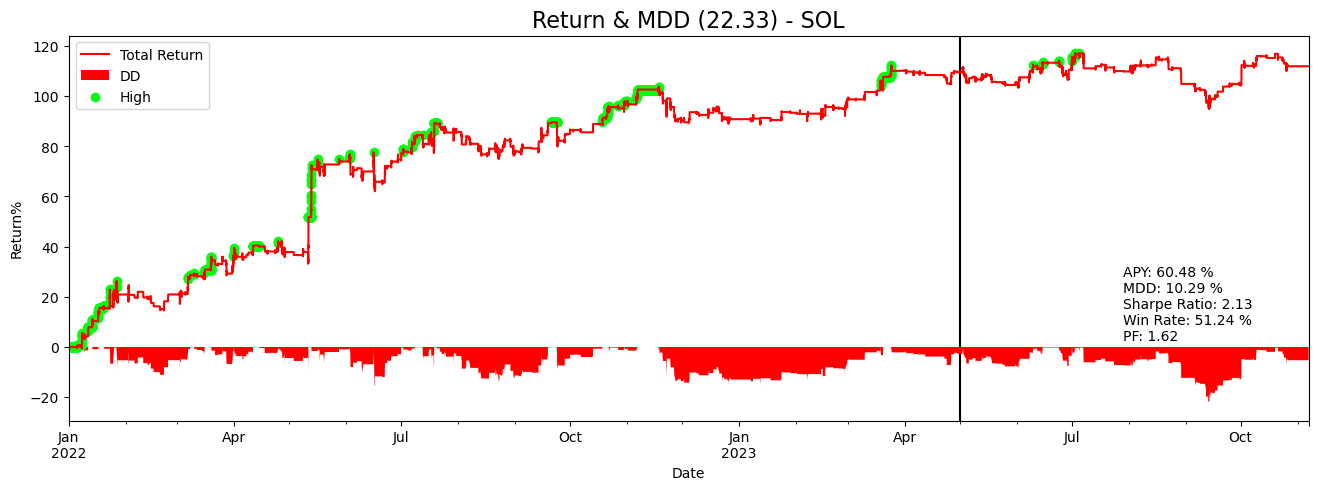

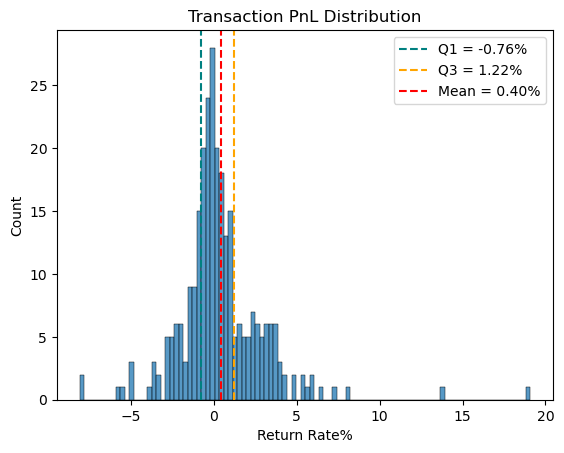

In [28]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'
# v2
params = {'window_l_k': 96, 'window_l_d': 96, 'window_s_k': 94, 'window_s_d': 78, 'upper_bound': 95}
# sol 1h : 40,48,100,126,95
config = {'freq':'15T', 'lag':1, 'fee': 0.0003}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
# analyze.plot_ret_dist(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

<AxesSubplot:xlabel='Entry Index'>

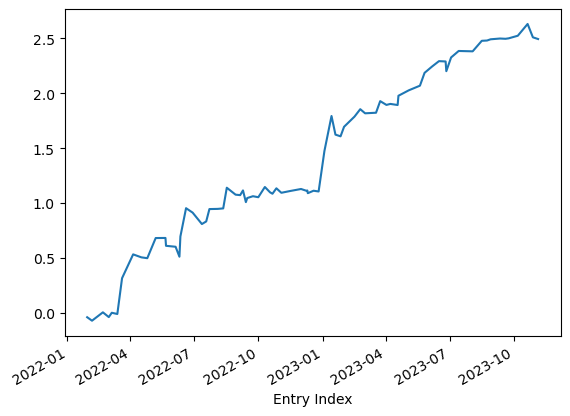

In [39]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= SOL BOTH Optimize Test =======================
Optimization trails: 4096


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Pl

Optimization time: 170.95 sec
---------- SOL BOTH ----------
{'window_l_k': 96, 'window_l_d': 40, 'window_s_k': 78, 'window_s_d': 86, 'upper_bound': 95}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:45:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9583.985086
Max Value                                  19822.490903
End Value                                  19389.790767
Total Return [%]                              93.897908
Benchmark Return [%]                         -87.147873
Total Time Exposure [%]                        7.632459
Max Gross Exposure [%]                        105.72143
Max Drawdown [%]                               7.313616
Max Drawdown Duration                  66 days 11:45:00
Total Orders                                        294
Total Fees Paid                              880.408002
Total T

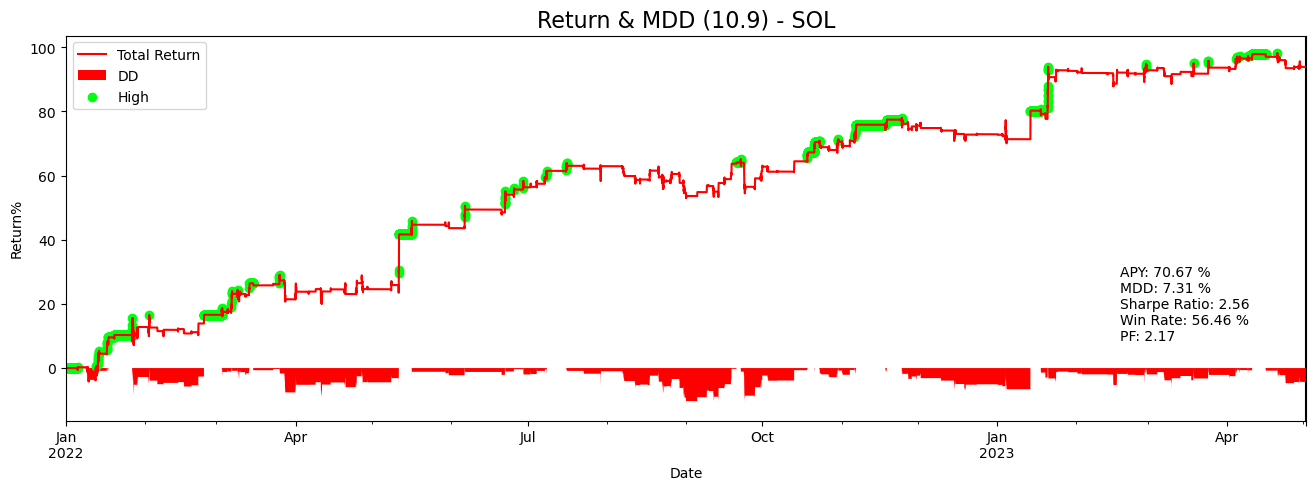

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     24.01 | 3824.22 | -1442.73 |       2.65 |   70.97 |         31 |
| 2022-06    |     32.57 | 4053.92 |  -797.41 |       5.08 |   63.16 |         19 |
| 2022-09    |      6.42 | 3332.61 | -2690.57 |       1.24 |   57.14 |         35 |
| 2022-12    |     10.11 | 2278.09 | -1266.74 |       1.8  |   50    |         24 |
| 2023-03    |     20.76 | 3415.26 | -1339.4  |       2.55 |   44.44 |         27 |
| 2023-06    |      0.23 |  529.17 |  -506.63 |       1.04 |   45.45 |         11 |
+------------+-----------+---------+----------+------------+---------+------------+


{'SOL': {'both': {0: {'window_l_k': 96,
    'window_l_d': 40,
    'window_s_k': 78,
    'window_s_d': 86,
    'upper_bound': 95}}}}

In [3]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

params={
    'window_l_k': [40, 100, 8],
    'window_l_d': [40, 100, 8],
    'window_s_k': [70, 130, 8],
    'window_s_d': [70, 130, 8],
    'upper_bound': [95, 96, 1]
    }

config = {'freq':'15T','fee': 0.0003}
# symbol_list = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
symbol_list = ['SOL']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)
all_params